In [1]:
#imports
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

Define a function named 'get_lower_and_upper_bounds' that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of `1.5`.

1. Using `lemonade.csv` dataset and focusing on continuous variables:

   - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
    - Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?
    - Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?
2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:

    - Use a 2 sigma decision rule to isolate the outliers.

        - Do these make sense?
        - Should certain outliers be kept or removed?
3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [2]:
lemonade = pd.read_csv('lemonade.csv')
lemonade.head(3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15


In [3]:
lemonade.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [11]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
lemonade.Flyers.quantile(0.25)

31.0

In [6]:
def get_fences(df, k=1.5):
    q1, q3 = df.quantile(0.25), df.quantile(0.75)
    iqr = q3 - q1
    lower_fence, upper_fence = (q1 - (k*iqr)), (q3 + (k*iqr))
    return lower_fence, upper_fence

In [7]:
get_fences(lemonade['Flyers'])

(4.0, 76.0)

In [8]:
lemonade[(lemonade.Flyers < get_fences(lemonade['Flyers'])[0]) | \
        (lemonade.Flyers > get_fences(lemonade['Flyers'])[1])]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


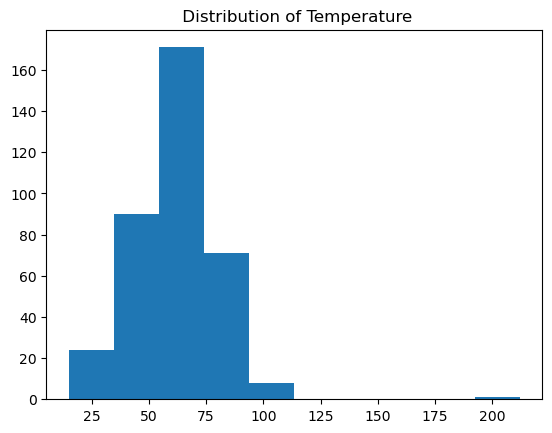

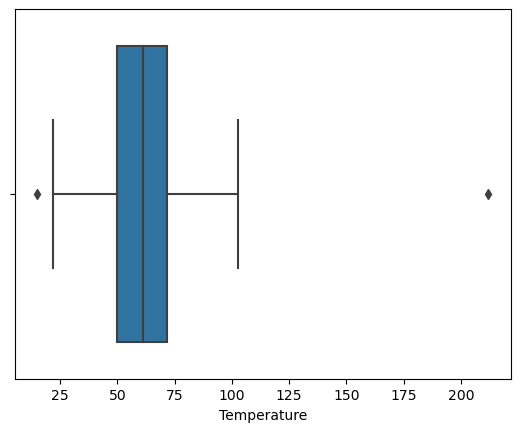

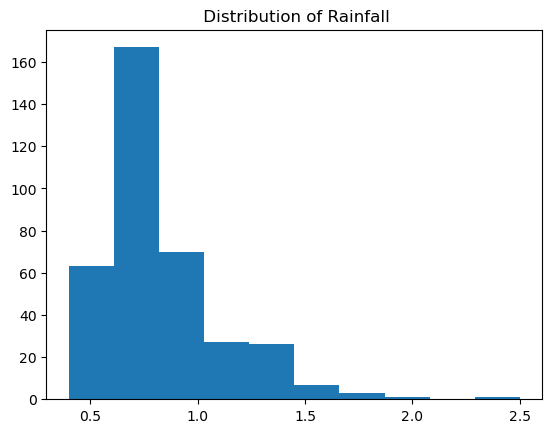

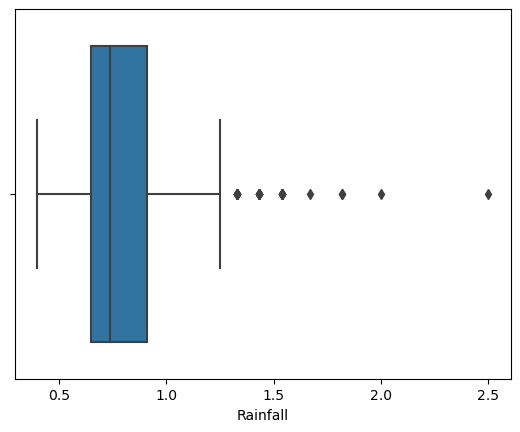

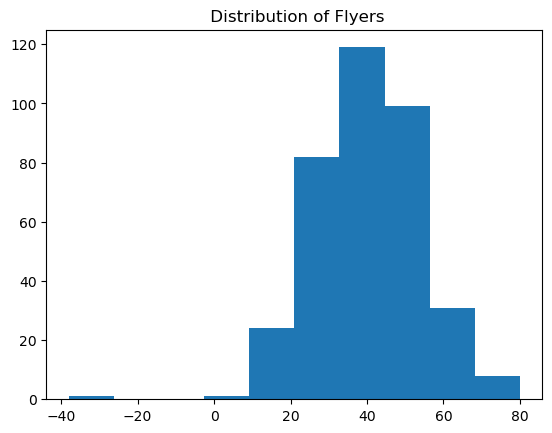

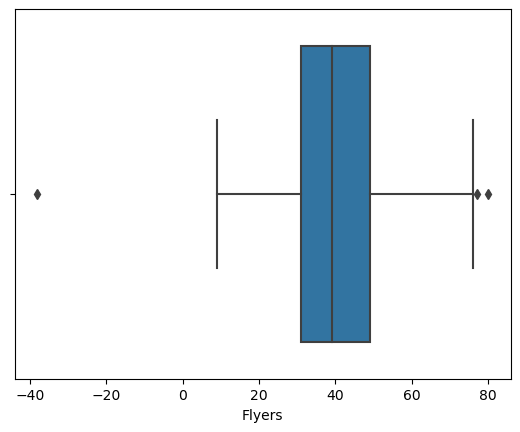

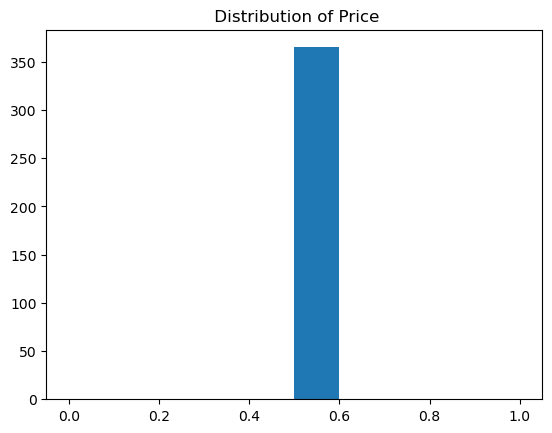

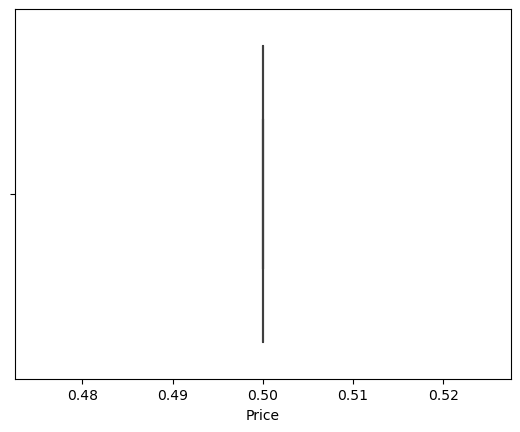

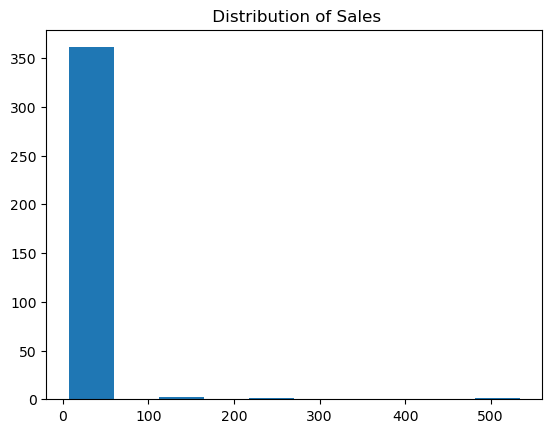

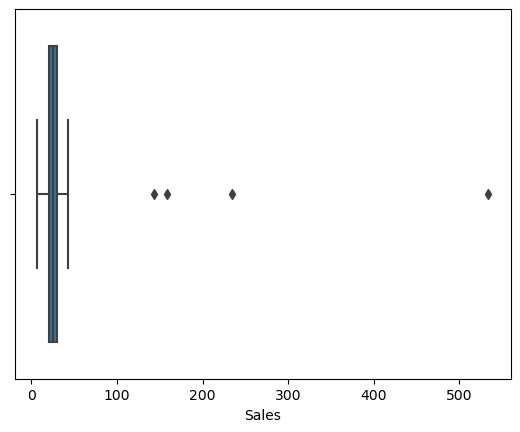

In [13]:
for col in lemonade.drop(columns=['Date','Day']):
    plt.hist(lemonade[col])
    plt.title(f' Distribution of {col}')
    plt.show()
    sns.boxplot(data=lemonade, x=col)
    plt.show()

In [14]:
for col in lemonade.drop(columns=['Date','Day']):
    print(f'For {col}:')
    print(lemonade[(lemonade[col] < get_fences(lemonade[col])[0]) | \
     (lemonade[col] > get_fences(lemonade[col])[1])].T.to_markdown())
    print('============================')

For Temperature:
|             | 41       | 364      |
|:------------|:---------|:---------|
| Date        | 2/11/17  | 12/31/17 |
| Day         | Saturday | Sunday   |
| Temperature | 212.0    | 15.1     |
| Rainfall    | 0.91     | 2.5      |
| Flyers      | 35       | 9        |
| Price       | 0.5      | 0.5      |
| Sales       | 21       | 7        |
For Rainfall:
|             | 0      | 1      | 2       | 5      | 6        | 10        | 11       | 12      | 15      | 16      | 19      | 23      | 27       | 28      | 337     | 338     | 342      | 343      | 345      | 346       | 347      | 350      | 351      | 354      | 355      | 359      | 363      | 364      |
|:------------|:-------|:-------|:--------|:-------|:---------|:----------|:---------|:--------|:--------|:--------|:--------|:--------|:---------|:--------|:--------|:--------|:---------|:---------|:---------|:----------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|:---------|
| Dat

In [15]:
lemonade[((lemonade.Flyers - lemonade.Flyers.mean()) / lemonade.Flyers.std()).abs() > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [16]:
for col in lemonade.drop(columns=['Date','Day']):
    print(f'For {col} at a z-score of 2 or more:')
    print(lemonade[((lemonade[col] - lemonade[col].mean()) / lemonade[col].std()).abs() > 2].T.to_markdown())
    print('==========')

For Temperature at a z-score of 2 or more:
|             | 41       | 166     | 176     | 181      | 190     | 198     | 202      | 207      | 338     | 364      |
|:------------|:---------|:--------|:--------|:---------|:--------|:--------|:---------|:---------|:--------|:---------|
| Date        | 2/11/17  | 6/16/17 | 6/26/17 | 7/1/17   | 7/10/17 | 7/18/17 | 7/22/17  | 7/27/17  | 12/5/17 | 12/31/17 |
| Day         | Saturday | Friday  | Monday  | Saturday | Monday  | Tuesday | Saturday | Thursday | Tuesday | Sunday   |
| Temperature | 212.0    | 99.3    | 102.6   | 102.9    | 98.0    | 99.3    | 99.6     | 97.9     | 22.0    | 15.1     |
| Rainfall    | 0.91     | 0.47    | 0.47    | 0.47     | 0.49    | 0.47    | 0.47     | 0.47     | 1.82    | 2.5      |
| Flyers      | 35       | 77      | 60      | 59       | 66      | 76      | 49       | 74       | 11      | 9        |
| Price       | 0.5      | 0.5     | 0.5     | 0.5      | 0.5     | 0.5     | 0.5      | 0.5      | 0.5     | 

In [17]:
for col in lemonade.drop(columns=['Date','Day']):
    print(f'For {col} at a z-score of 3 or more:')
    print(lemonade[col][((lemonade[col] - lemonade[col].mean()) / lemonade[col].std()).abs() > 3].T.to_markdown())
    print('==========')

For Temperature at a z-score of 3 or more:
|    |   Temperature |
|---:|--------------:|
| 41 |           212 |
For Rainfall at a z-score of 3 or more:
|     |   Rainfall |
|----:|-----------:|
|   0 |       2    |
|  15 |       1.67 |
| 338 |       1.82 |
| 343 |       1.82 |
| 364 |       2.5  |
For Flyers at a z-score of 3 or more:
|     |   Flyers |
|----:|---------:|
| 324 |      -38 |
For Price at a z-score of 3 or more:
| Price   |
|---------|
For Sales at a z-score of 3 or more:
|     |   Sales |
|----:|--------:|
| 181 |     143 |
| 182 |     158 |
| 183 |     235 |
| 184 |     534 |


In [21]:
# being more strict about tukey this time: finding the real weird ones:
for col in lemonade.drop(columns=['Date','Day']):
    print(lemonade[col][(lemonade[col] < get_fences(lemonade[col], k=2)[0]) | \
     (lemonade[col] > get_fences(lemonade[col], k=2)[1])].T.to_markdown())
    print('============')

|    |   Temperature |
|---:|--------------:|
| 41 |           212 |
|     |   Rainfall |
|----:|-----------:|
|   0 |       2    |
|   5 |       1.54 |
|   6 |       1.54 |
|  10 |       1.54 |
|  15 |       1.67 |
|  23 |       1.54 |
| 337 |       1.54 |
| 338 |       1.82 |
| 343 |       1.82 |
| 347 |       1.54 |
| 355 |       1.54 |
| 364 |       2.5  |
|     |   Flyers |
|----:|---------:|
| 324 |      -38 |
| Price   |
|---------|
|     |   Sales |
|----:|--------:|
| 181 |     143 |
| 182 |     158 |
| 183 |     235 |
| 184 |     534 |


In [18]:
# being more strict about tukey this time: finding the real weird ones:
for col in lemonade.drop(columns=['Date','Day']):
    print(lemonade[col][(lemonade[col] < get_fences(lemonade[col], k=3)[0]) | \
     (lemonade[col] > get_fences(lemonade[col], k=3)[1])].T.to_markdown())
    print('============')

|    |   Temperature |
|---:|--------------:|
| 41 |           212 |
|     |   Rainfall |
|----:|-----------:|
|   0 |       2    |
| 338 |       1.82 |
| 343 |       1.82 |
| 364 |       2.5  |
|     |   Flyers |
|----:|---------:|
| 324 |      -38 |
| Price   |
|---------|
|     |   Sales |
|----:|--------:|
| 181 |     143 |
| 182 |     158 |
| 183 |     235 |
| 184 |     534 |


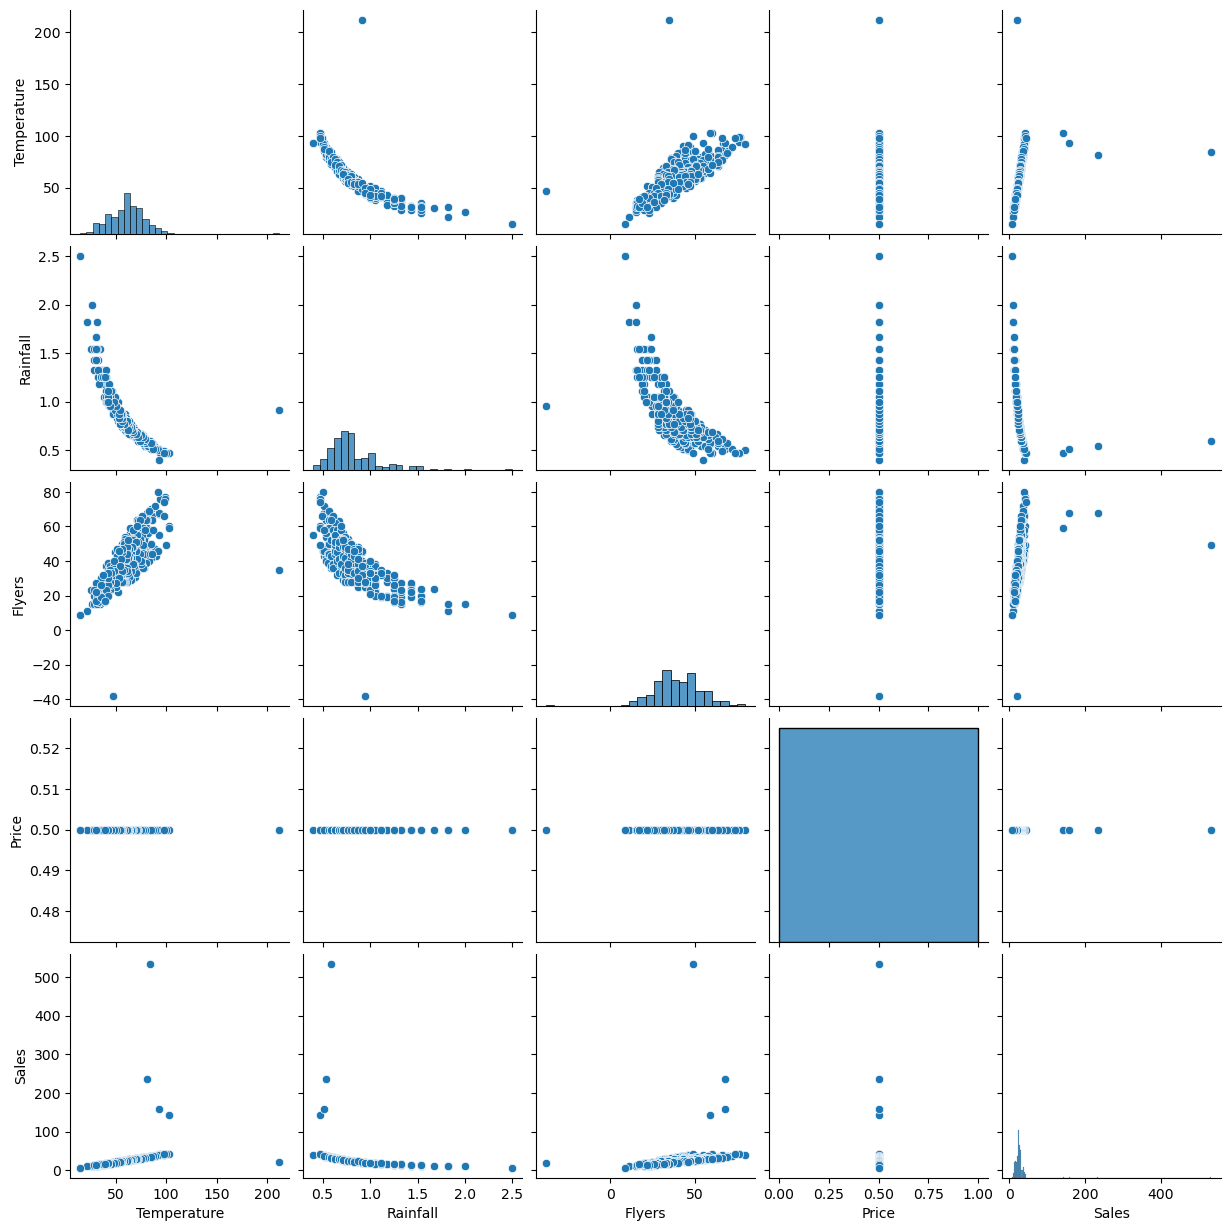

In [20]:
sns.pairplot(data=lemonade);